# Compolsory Assignment 4: Variational Autoencoders
Please fill out the the group name, number, members and optionally the name below.

**Group number**: 3\
**Group member 1**: Sara Marie Åseng Almdahl\
**Group member 2**: Fredrik Gard Haugen\
**Group member 3**: Kim Andre Nielsen\
**Group name (optional)**:

# Assignment Submission
To complete this assignment answer the relevant questions in this notebook and write the code required to implement the relevant models. It consists of **<u>two tasks</u>**. At the end of each task, there are discussion questions that _must_ be answered. The assignemnt is submitted by handing in this notebook as an .ipynb file and as a .pdf file.

We will explore autoencoder networks using the **Sign Language MNIST** dataset from Kaggle (as same as CA1). It contains 28×28 grayscale images of hand signs representing letters A–Y (excluding J and Z), for 24 classes in total. The data is provided as CSV files with a label column and 784 pixel columns. The standard split includes 27,455 training images and 7,172 test images

Autoencoder is an introduction to encoder-decoder architecture. Here we will use an encoder to transform the data into an latent representation, and a decoder to project it back into the visual space.
Two main components: an **encoder** and a **decoder**.
 - The encoder takes in the input data and maps it to a lower-dimensional latent representation. It typically consists of multiple layers that gradually reduce the dimensionality of the input data, capturing its essential features. The output of the encoder is a compressed representation of the input, often referred to as a code or latent vector.
 - The decoder, on the other hand, takes the code from the encoder and reconstructs the original data from it. It mirrors the architecture of the encoder by gradually expanding the code back to the original dimensionality. The output of the decoder is a reconstruction of the input data, which ideally should closely resemble the original input.

<div>
<img src="https://tikz.net/janosh/autoencoder.png" width="300"/>
<div>

In [14]:
# # Sell soul to google
# from google.colab import drive
# drive.mount('/content/drive')

---

### **Task 1**
- Load the SignMNIST dataset.
	- > Use the provided CSV files sign_mnist_train.csv and sign_mnist_test.csv.
	- Normalize the images to have pixel values between 0 and 1.
- Build an autoencoder model.
	- The encoder should compress the images into a lower-dimensional latent space.
	- The decoder should reconstruct the images from the latent space.
	- The intermediat layers can either be linear or convolutional.
- Train the autoencoder.
	- Use `binary-cross-entropy` loss function for _reconstruction_ (i.e. target value = input value)
	- You can choose optimizer freely (Adam is recommended).
- Visualize the reconstructed images.
	- _Compare_ original and reconstructed images.
- Visualize the latent space
	- Use PCA to visualize the 2d-latent space.
	- Use the digit as labels
- Answer the discussion questions

In [15]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

In [16]:
# 1. Load and preprocess the Sign MNIST dataset
train = pd.read_csv(r"C:\Users\saraa\OneDrive\Ås\7. semester\DAT300\CA4\sign_mnist_train.csv")
test  = pd.read_csv(r"C:\Users\saraa\OneDrive\Ås\7. semester\DAT300\CA4\sign_mnist_test.csv")

X_train = train.drop(columns=['label']).to_numpy(dtype=np.float32)
y_train = train['label'].to_numpy(dtype=np.int32)
X_test  = test.drop(columns=['label']).to_numpy(dtype=np.float32)
y_test  = test['label'].to_numpy(dtype=np.int32)


X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Scaling
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)


array([[ 0.08657677,  0.01251154, -0.0319471 , ..., -0.78938985,
        -0.6467282 , -0.82031494],
       [-0.46954575, -0.51325834, -0.51843333, ...,  0.34809467,
         0.32797274,  0.31330165],
       [-1.4608943 , -1.514725  , -1.5170105 , ...,  0.99582887,
         0.988254  ,  0.9655193 ],
       ...,
       [ 1.0779253 ,  1.0640514 ,  0.9922344 , ...,  0.77465135,
         0.75243926,  0.7481134 ],
       [ 1.3438969 ,  1.4145646 ,  1.453116  , ..., -1.5003176 ,
        -1.4327773 , -1.5035907 ],
       [ 0.6668784 ,  0.63842803,  0.55695724, ...,  0.52187705,
         0.50090355,  0.49964952]], dtype=float32)

In [17]:
# 2. Build the autoencoder model
input_img = Input(shape=X_train.shape[1:])
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(np.prod(X_train.shape[1:]), activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [18]:
# 3. Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0264 - val_loss: 0.0183
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0159 - val_loss: 0.0154
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0131 - val_loss: 0.0121
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0113 - val_loss: 0.0106
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0092 - val_loss: 0.0089
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0080 - val_loss: 0.0078
Epoch 9/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0074 - val_loss: 0.0077
Epoch 10/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - val_loss: 0.0072


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


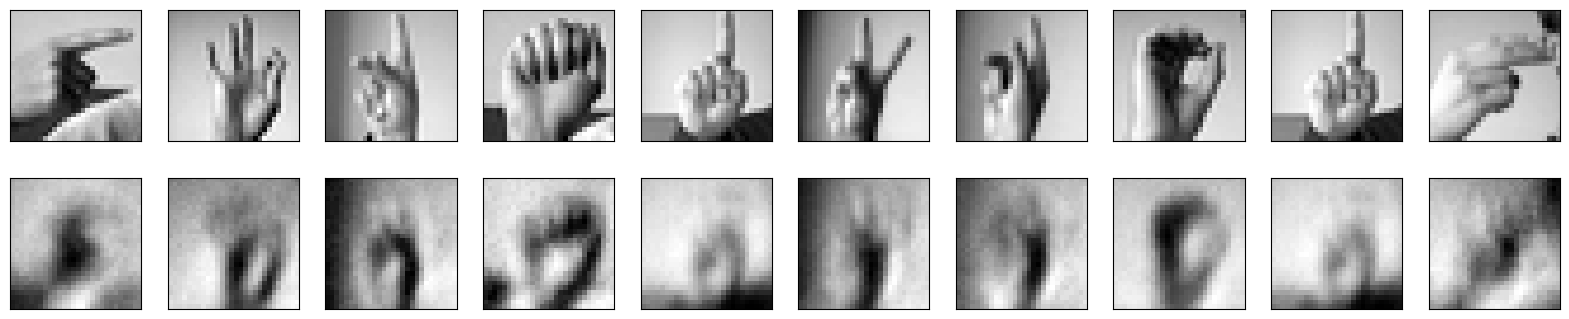

In [19]:
# 4. Visualize the reconstructed images
encoded_imgs = autoencoder.predict(X_test)

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step


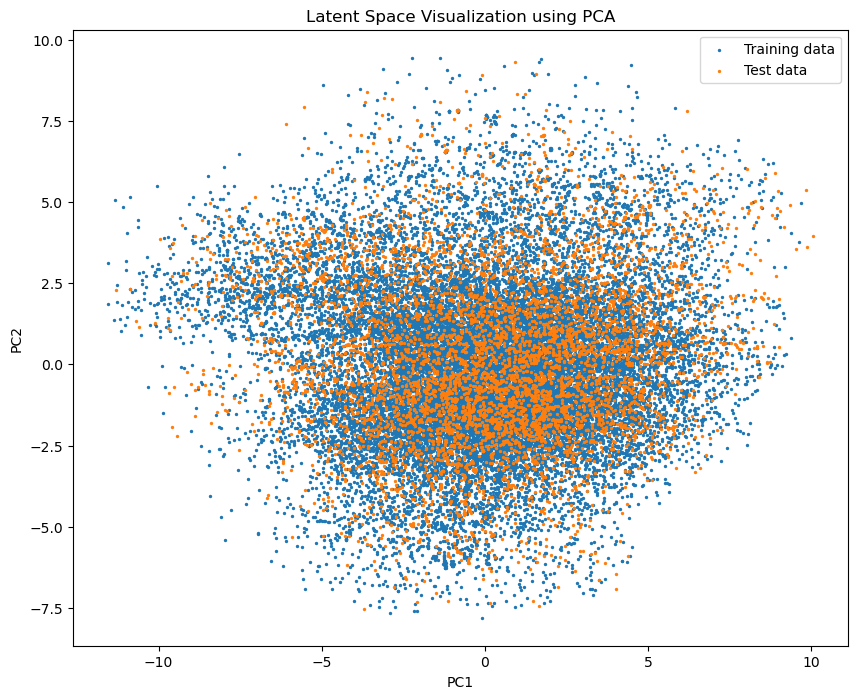


Variance of the latent space of the traing data explained with 2 pca dimension: 0.358142


In [20]:
# 5. Visualize the PCA-projection of the latent space. Try to inlcude the labels in the plot for a better understanding of
# the distribution of the latent space.

model_AE_latent_space = Model(input_img, encoded)

AE_latent_space_train = model_AE_latent_space.predict(X_train)
AE_latent_space_test = model_AE_latent_space.predict(X_test)

pca_AE = PCA(2)

AE_latent_space_train_pca = pca_AE.fit_transform(AE_latent_space_train)
AE_latent_space_test_pca = pca_AE.transform(AE_latent_space_test)

plt.figure(figsize=(10, 8))
plt.scatter(AE_latent_space_train_pca[:, 0], AE_latent_space_train_pca[:, 1], label="Training data", s=2)
plt.scatter(AE_latent_space_test_pca[:, 0], AE_latent_space_test_pca[:, 1], label="Test data", s=2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Latent Space Visualization using PCA")
plt.legend()
plt.show()


print(f"\nVariance of the latent space of the traing data explained with 2 pca dimension: {pca_AE.explained_variance_ratio_.cumsum()[1]:2f}")

**Discussion**
1. Why do we normalize the pixel values of the images?
2. How does the size of the latent space affect the reconstructed images?
3. Can autoencoders be used for noise reduction? How?

### Discuss here

1) We normalize to define the underlying distrubution of the data.
2) The larger the latent space the more information the model has for reconstruction, but at the risk of overfitting. On the other hand, a too small latent space will make reconstruction difficult, and may result in inaccurate/fuzzy images.
3) Autoencoders can be used for noise reduction since they compress data to a lower dimentional representation with less information. It will only contain the information that "explains" most of the data.

___
### **Task 2**

In contrast to simple autoencoders, which aim to learn a deterministic mapping from input data to a compressed latent space and back, **Variational Autoencoders (VAEs)** introduce a probabilistic approach to the latent space. While simple autoencoders can reconstruct data effectively, they are not inherently capable of generating new, realistic data samples. VAEs, on the other hand, are designed for _both reconstruction and generation_ of novel data samples, making them highly useful for generative modeling tasks.

**Why VAEs?** A simple autoencoder maps input data to a fixed point in the latent space, meaning that each input has a single corresponding latent vector. While this approach works well for compression and reconstruction, it lacks the ability to generalize and generate new data points because the latent space is not continuous or well-structured.

In contrast, a Variational Autoencoder treats the latent space probabilistically. Instead of mapping each input to a single point, it maps inputs to a distribution (typically a Gaussian distribution) in the latent space. This probabilistic treatment allows for the generation of new samples by sampling from the learned distribution, thus enabling the model to create *new*, unseen data points that resemble the training data.

**How VAEs Work?** In a VAE, the _encoder_ maps the input data to <u>two</u> vectors: a _mean vector_ and a _variance (or log variance) vector_ (in contrast to one as in a traditional AE). These vectors represent a Gaussian distribution in the latent space. Instead of encoding to a fixed point, the model <u>samples</u> a latent vector from this distribution, using these mean and variance parameters. This sampling introduces variability, allowing the VAE to explore different parts of the latent space and generate diverse outputs.

The _decoder_ then reconstructs the data by decoding from the sampled latent vector, which can either come from the encoded input or be randomly generated. This process makes VAEs ideal for generating novel data samples in applications like image generation.

**The loss function?** The loss function plays a crucial role in training the model to both reconstruct input data and ensure that the latent space is properly structured. The VAE loss function consists of two main components:
# 1. Reconstruction Loss

Measures how well the VAE is able to reconstruct the input data from the latent space.  
Typically, this is computed using **binary cross-entropy** (for normalized image data) or **mean squared error** (for continuous data).  
For images, binary cross-entropy is often used.

$$
\mathcal{L}_{\text{reconstruction}}(x, \hat{x}) =
- \sum_{i=1}^{N} \left[ x_i \log(\hat{x}_i) + (1 - x_i)\log(1 - \hat{x}_i) \right]
$$

Where:  
- $x_i$ is the original data point (e.g., pixel value)  
- $\hat{x}_i$ is the reconstructed data point  
- $N$ is the number of data points or pixels  

---

# 2. KL Divergence Loss

Ensures that the learned latent distribution $q(z|x)$, parameterized by $\mu$ and $\sigma^2$,  
is close to a standard normal distribution $p(z) = \mathcal{N}(0, I)$.

$$
\mathcal{L}_{\text{KL}}(q(z|x) \parallel p(z)) =
\frac{1}{2} \sum_{j=1}^{d}
\left( 1 + \log(\sigma_j^2) - \mu_j^2 - \sigma_j^2 \right)
$$

Where:  
- $\mu_j$ is the mean of the latent variable distribution  
- $\sigma_j^2$ is the variance of the latent variable distribution  
- $d$ is the dimensionality of the latent space  

---

### 🧮 Total VAE Loss

The total loss function for a VAE is the sum of the reconstruction loss and the KL divergence loss:

$$
\mathcal{L}_{\text{VAE}} =
\mathcal{L}_{\text{reconstruction}} + \mathcal{L}_{\text{KL}}
$$


**The Role of KL Divergence**

A crucial aspect of training VAEs is ensuring that the latent space is well-structured and that the learned distributions align with a _prior distribution_ (typically a standard normal distribution). This is where the _Kullback-Leibler (KL) divergence loss_ comes in. KL divergence measures how different the learned distribution is from the desired prior distribution. By minimizing KL divergence during training, the VAE ensures that the latent space follows a continuous, smooth distribution, making it easier to generate realistic new samples by sampling from this space.

In summary, VAEs combine the strengths of autoencoders for reconstruction with a probabilistic latent space, enabling the generation of new data samples and ensuring smooth interpolation within the latent space through the use of KL divergence. This combination makes VAEs a powerful generative model in unsupervised learning tasks.

<div>
<img src="https://tikz.net/janosh/vae.png" width="350"/>
<div>

Run the following code

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model, backend as K
import matplotlib.pyplot as plt
import keras
from keras import ops, layers
from tensorflow.keras.layers import Layer

In [22]:
# Load the MNIST dataset.
# train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAT300 gruppe3/CA4/sign_mnist_train.csv")
# test_df  = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAT300 gruppe3/CA4/sign_mnist_test.csv")
train_df = pd.read_csv(r"C:\Users\saraa\OneDrive\Ås\7. semester\DAT300\CA4\sign_mnist_train.csv")
test_df  = pd.read_csv(r"C:\Users\saraa\OneDrive\Ås\7. semester\DAT300\CA4\sign_mnist_test.csv")


x_train = train_df.drop(columns=['label']).to_numpy().astype('float32') / 255.0
x_test  = test_df.drop(columns=['label']).to_numpy().astype('float32') / 255.0

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test), 28, 28, 1))

y_train = train_df['label'].to_numpy()
y_test  = test_df['label'].to_numpy()

In [23]:
latent_dim = 2  # Dimensionality of the latent space (small for simplicity)
input_shape = (28, 28, 1)  # Input image shape

In [24]:
# We define the encoder in a similar way as the autoencoder
input_img = layers.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

In [25]:
# However, instead of a single output layer to the latent space, we have two output layers (latent space parameters: mean (mu) and log variance (log_var))
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

In [26]:
# We define a sampling function to sample from the latent space, which introduces stochasticity in the model and helps in training (as it still alows gradients to flow backwards)
# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=K.shape(z_mean))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [27]:
# There are multiple ways to sample from the latent space, here I introduce a Lambda layer, which allows to use arbitrary functions as layers in the model
# Note the output shape of the Lambda layer; we are returning the (sampled) latent space, and the learned parameters (mean and log variance)- these are used in the loss function
z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

In [28]:
# The decoder is defined in the same way as the autoencoder
decoder_input = layers.Input(shape=(latent_dim,))
d = layers.Dense(7 * 7 * 64, activation='relu')(decoder_input)
d = layers.Reshape((7, 7, 64))(d)
d = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(d)
d = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(d)
decoded_img = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(d)

In a Variational Autoencoder (VAE), adjusting the weight of the KL divergence loss controls the balance between data reconstruction accuracy and latent space regularization. Increasing the weight encourages a more structured and continuous latent space but may reduce reconstruction quality, while decreasing it improves reconstruction but risks losing meaningful structure in the latent space.

In [29]:
#KL divergence loss weight. This is a hyperparameter that can be tuned, run ALL cells below to see the effect of different values.
# This is the value you should experiment with
KL_weight = 1.0

In [30]:
# Having build our layers, we can now define the models
encoder = Model(input_img, [z_mean, z_log_var, z], name='encoder')
decoder = Model(decoder_input, decoded_img, name='decoder')

# VAE model that connects the encoder and decoder
vae_output = decoder(encoder(input_img)[2])
vae = Model(input_img, vae_output, name='vae')

In [31]:
# VAE Loss Layer
# Variables: x (input), x_hat (reconstruction), mu (z_mean), logvar (z_log_var)

class VAE_LossLayer(Layer):
    def __init__(self, beta=1.0, rec_kind="bce", **kwargs):
        super(VAE_LossLayer, self).__init__(**kwargs)
        self.beta = beta
        self.rec_kind = rec_kind

    def call(self, inputs):
        x, x_hat, mu, logvar = inputs

        # Reconstruction loss
        if self.rec_kind == "bce":
            rec_loss = -tf.reduce_sum(
                x * tf.math.log(tf.clip_by_value(x_hat, 1e-7, 1.0)) +
                (1 - x) * tf.math.log(tf.clip_by_value(1 - x_hat, 1e-7, 1.0)),
                axis=[1, 2, 3]
            )
        elif self.rec_kind == "mse":
            rec_loss = tf.reduce_sum(tf.square(x - x_hat), axis=[1, 2, 3])
        else:
            raise ValueError("rec_kind must be 'bce' or 'mse'")

        # KL Divergence
        kl_loss = -0.5 * tf.reduce_sum(1 + logvar - tf.square(mu) - tf.exp(logvar), axis=1)

        # Total loss
        total_loss = tf.reduce_mean(rec_loss + self.beta * kl_loss)

        self.add_loss(total_loss)
        return x_hat


In [32]:
# The modeles we are trying to create share the same layers with the same weigths. Going to solve this by creating a function which creates the modeles.
def createVAEmodel(beta=1, latent_dim=2, input_shape=(28,28,1)):
  input_img = layers.Input(shape=input_shape)
  x = layers.Conv2D(32, 3, activation='relu', padding='same')(input_img)
  x = layers.MaxPooling2D(2, padding='same')(x)
  x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
  x = layers.MaxPooling2D(2, padding='same')(x)
  x = layers.Flatten()(x)
  x = layers.Dense(128, activation='relu')(x)


  decoder_input = layers.Input(shape=(latent_dim,))
  d = layers.Dense(7 * 7 * 64, activation='relu')(decoder_input)
  d = layers.Reshape((7, 7, 64))(d)
  d = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(d)
  d = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(d)
  decoded_img = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(d)

  z_mean = layers.Dense(latent_dim)(x)
  z_log_var = layers.Dense(latent_dim)(x)
  z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

  encoder = Model(input_img, [z_mean, z_log_var, z], name='encoder')
  decoder = Model(decoder_input, decoded_img, name='decoder')

  vae_output = decoder(encoder(input_img)[2])
  vae = Model(input_img, vae_output, name='vae')

  lossed_output = VAE_LossLayer(beta=beta, rec_kind="bce")(
    [input_img, vae_output, z_mean, z_log_var]
  )

  return (keras.Model(inputs=input_img, outputs=lossed_output, name="vae"), encoder, decoder)


In [33]:
#Train the VAE
"""
lossed_output_list = []

lossed_output = VAE_LossLayer(beta=1.0, rec_kind="bce")(
    [input_img, vae_output, z_mean, z_log_var]
)

lossed_output_list.append(VAE_LossLayer(beta=0.1, rec_kind="bce")(
    [input_img, vae_output, z_mean, z_log_var]
))

lossed_output_list.append(lossed_output)

lossed_output_list.append(VAE_LossLayer(beta=5, rec_kind="bce")(
    [input_img, vae_output, z_mean, z_log_var]
))


vae_01 = keras.Model(inputs=input_img, outputs=lossed_output_list[0], name="vae")
vae_1 = keras.Model(inputs=input_img, outputs=lossed_output_list[1], name="vae")
vae_5 = keras.Model(inputs=input_img, outputs=lossed_output_list[2], name="vae")

vae_01.compile(optimizer="adam")
vae_1.compile(optimizer="adam")
vae_5.compile(optimizer="adam")
"""

beta_list = [0.1, 1, 5]   # Weigths of the KL divergence term
latent_dim_list = [2, 4, 8]   # Dimensionality of the different latent spaces


vae_b01_ld2, encoder_b01_ld2, decoder_b01_ld2 = createVAEmodel(0.1, 2)
vae_b1_ld2, encoder_b1_ld2, decoder_b1_ld2 = createVAEmodel(1, 2)
vae_b5_ld2, encoder_b5_ld2, decoder_b5_ld2 = createVAEmodel(5, 2)
vae_b01_ld4, encoder_b01_ld4, decoder_b01_ld4 = createVAEmodel(0.1, 4)
vae_b1_ld4, encoder_b1_ld4, decoder_b1_ld4 = createVAEmodel(1, 4)
vae_b5_ld4, encoder_b5_ld4, decoder_b5_ld4 = createVAEmodel(5, 4)
vae_b01_ld8, encoder_b01_ld8, decoder_b01_ld8 = createVAEmodel(0.1, 8)
vae_b1_ld8, encoder_b1_ld8, decoder_b1_ld8 = createVAEmodel(1, 8)
vae_b5_ld8, encoder_b5_ld8, decoder_b5_ld8 = createVAEmodel(5, 8)

vae_b01_ld2.compile(optimizer="adam")
vae_b1_ld2.compile(optimizer="adam")
vae_b5_ld2.compile(optimizer="adam")
vae_b01_ld4.compile(optimizer="adam")
vae_b1_ld4.compile(optimizer="adam")
vae_b5_ld4.compile(optimizer="adam")
vae_b01_ld8.compile(optimizer="adam")
vae_b1_ld8.compile(optimizer="adam")
vae_b5_ld8.compile(optimizer="adam")

#Feel free to play around with the paramaters

print("\nHistory beta=0.1 latent_dim=2")
history_b01_ld2 = vae_b01_ld2.fit(
    x_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test,),
    verbose=2,
)

print("\nHistory beta=1 latent_dim=2")
history_b1_ld2 = vae_b1_ld2.fit(
    x_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test,),
    verbose=2,
)

print("\nHistory beta=5 latent_dim=2")
history_b5_ld2 = vae_b5_ld2.fit(
    x_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test,),
    verbose=2,
)

print("\nHistory beta=0.1 latent_dim=4")
history_b01_ld4 = vae_b01_ld4.fit(
    x_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test,),
    verbose=2,
)

print("\nHistory beta=1 latent_dim=4")
history_b1_ld4 = vae_b1_ld4.fit(
    x_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test,),
    verbose=2,
)

print("\nHistory beta=5 latent_dim=4")
history_b5_ld4 = vae_b5_ld4.fit(
    x_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test,),
    verbose=2,
)

print("\nHistory beta=0.1 latent_dim=8")
history_b01_ld8 = vae_b01_ld8.fit(
    x_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test,),
    verbose=2,
)

print("\nHistory beta=1 latent_dim=8")
history_b1_ld8 = vae_b1_ld8.fit(
    x_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test,),
    verbose=2,
)

print("\nHistory beta=5 latent_dim=8")
history_b5_ld8 = vae_b5_ld8.fit(
    x_train,
    epochs=25,
    batch_size=128,
    validation_data=(x_test,),
    verbose=2,
)





History beta=0.1 latent_dim=2
Epoch 1/5
215/215 - 16s - 75ms/step - loss: 501.1461 - val_loss: 489.7151
Epoch 2/5
215/215 - 12s - 57ms/step - loss: 491.7696 - val_loss: 487.6304
Epoch 3/5
215/215 - 12s - 58ms/step - loss: 490.0523 - val_loss: 486.3472
Epoch 4/5
215/215 - 12s - 57ms/step - loss: 488.8440 - val_loss: 485.4825
Epoch 5/5
215/215 - 12s - 57ms/step - loss: 487.9397 - val_loss: 484.9013

History beta=1 latent_dim=2
Epoch 1/5
215/215 - 15s - 71ms/step - loss: 508.5249 - val_loss: 496.6838
Epoch 2/5
215/215 - 12s - 57ms/step - loss: 498.7359 - val_loss: 492.6725
Epoch 3/5
215/215 - 20s - 95ms/step - loss: 494.9412 - val_loss: 491.2259
Epoch 4/5
215/215 - 12s - 56ms/step - loss: 493.8474 - val_loss: 490.4708
Epoch 5/5
215/215 - 12s - 58ms/step - loss: 493.3108 - val_loss: 490.2361

History beta=5 latent_dim=2
Epoch 1/5
215/215 - 15s - 72ms/step - loss: 512.7363 - val_loss: 501.9095
Epoch 2/5
215/215 - 12s - 55ms/step - loss: 504.1385 - val_loss: 500.5750
Epoch 3/5
215/215 - 12

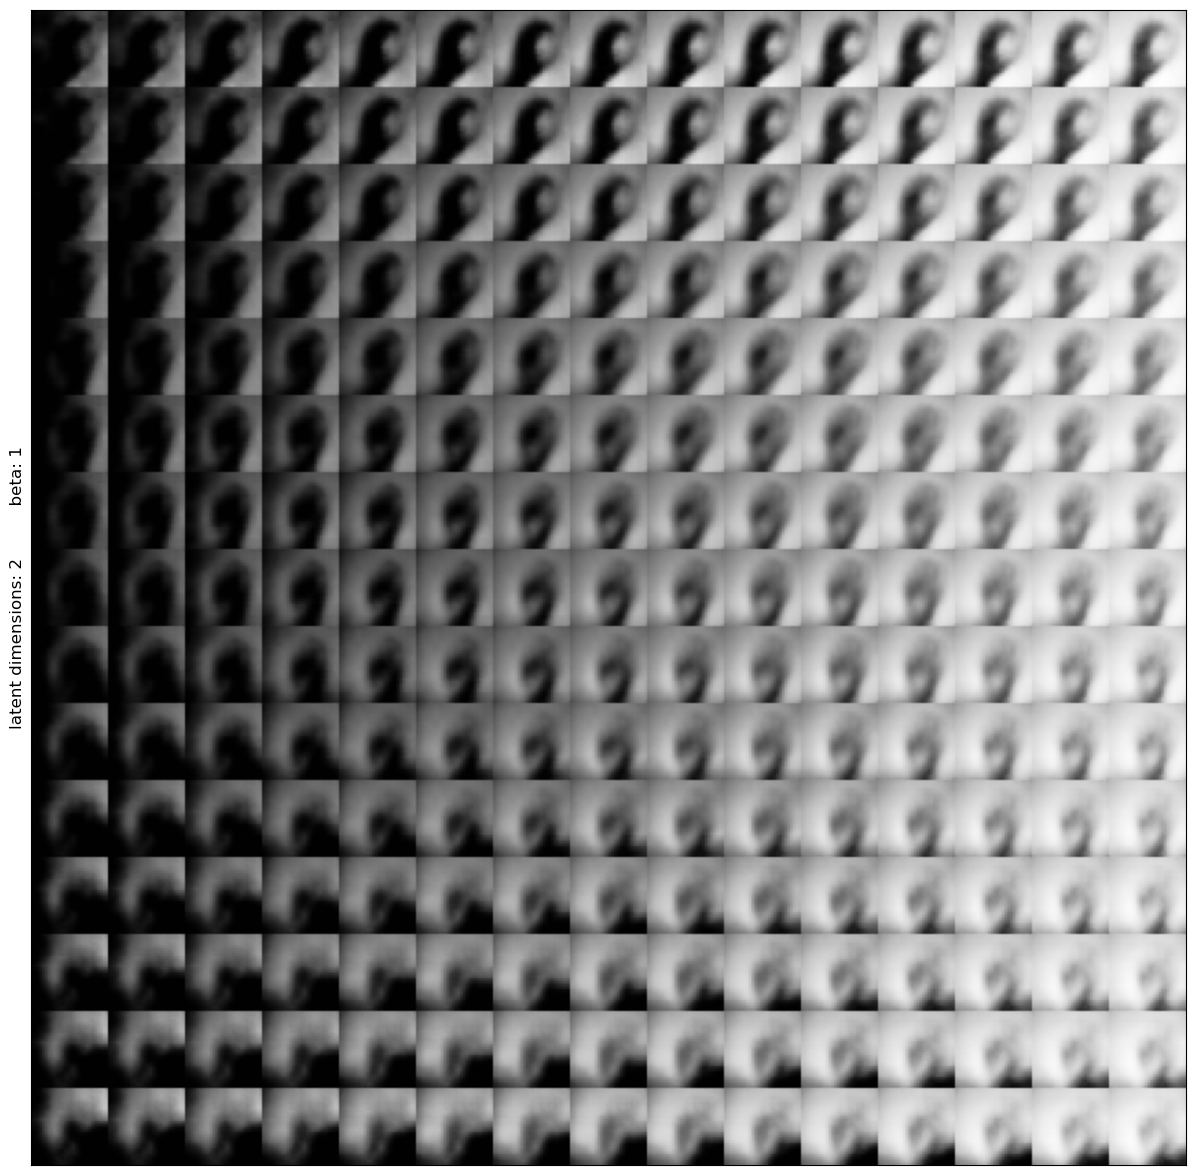

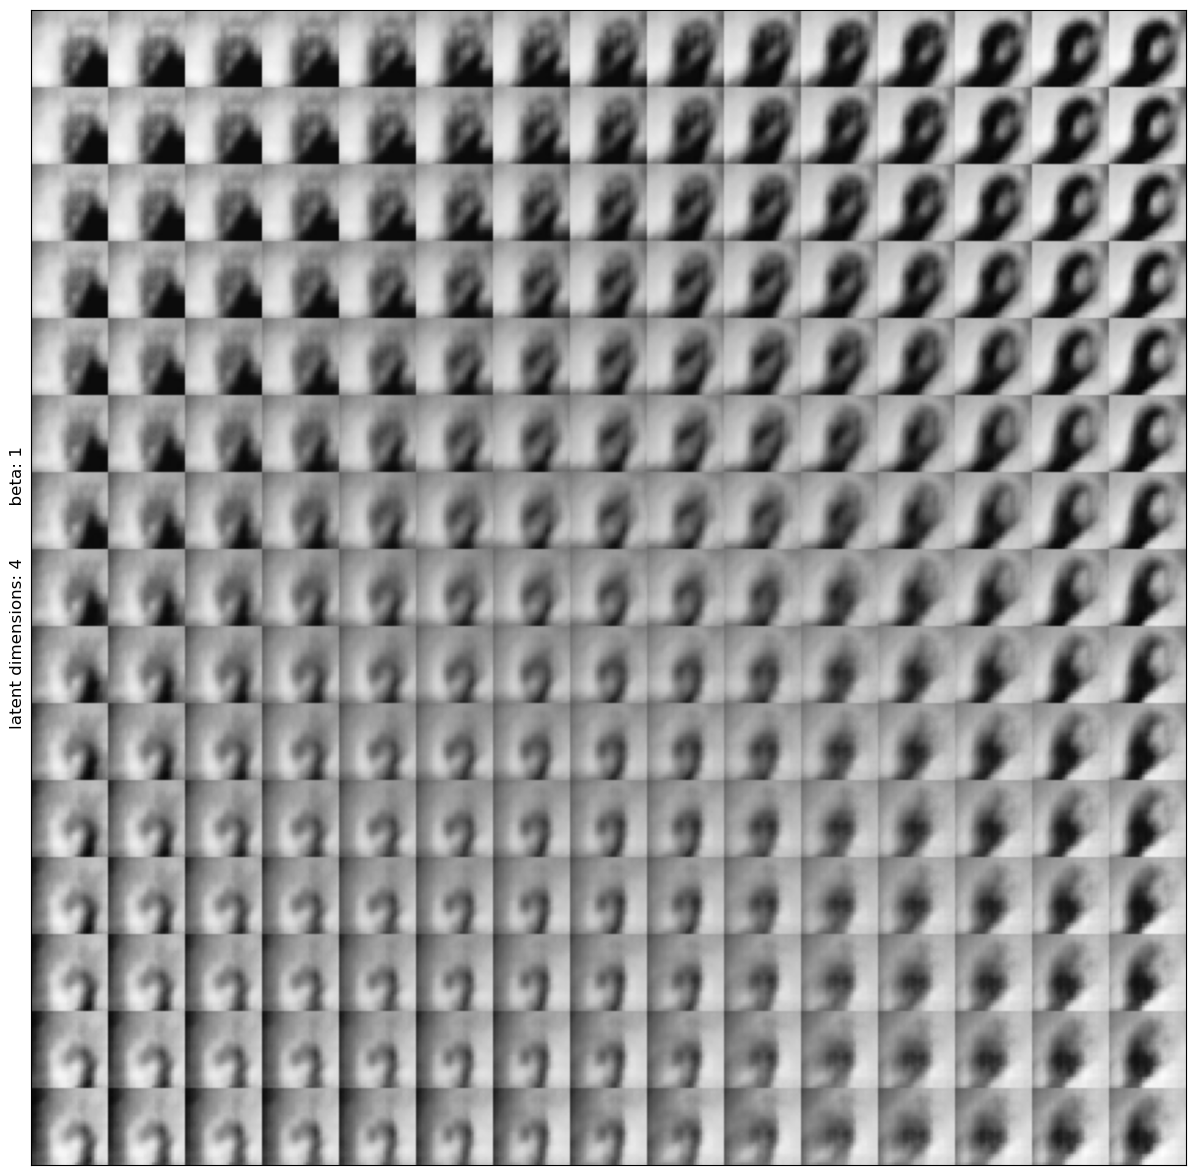

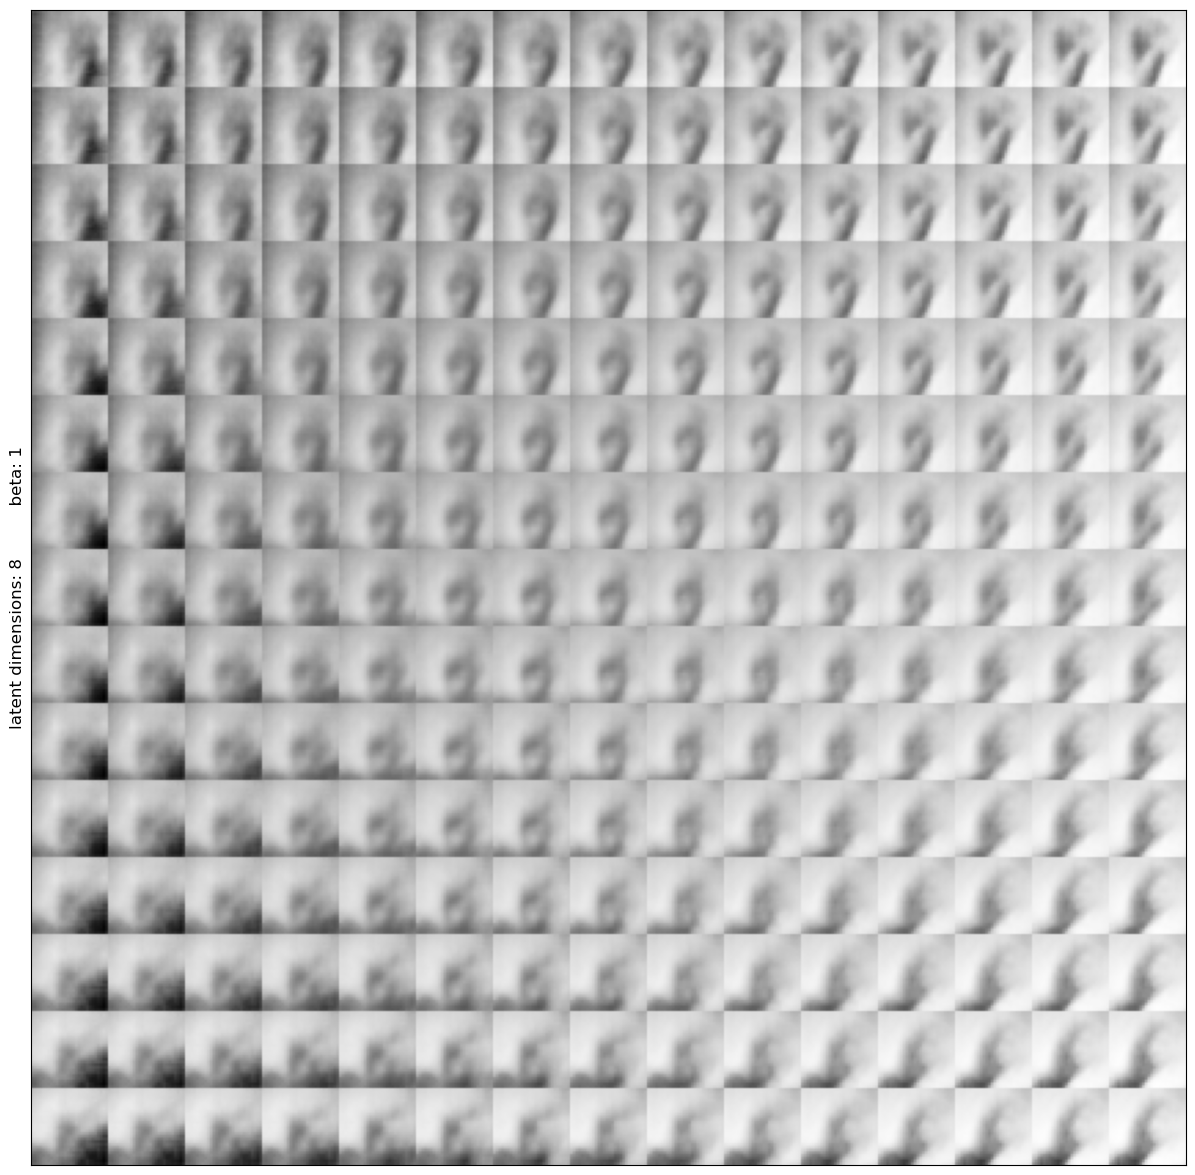

In [34]:
# Run this visualisation code after training the VAE to answere the discussion questions.
def plot_latent_space(decoder, encoder=None, data=None, beta=1, latent_dim=2, n=15, figsize=15):
    """Plots a grid of digits decoded from the VAE's latent space."""
    scale = 2.0
    figure = np.zeros((28 * n, 28 * n))

    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)

    if latent_dim > 2:
      pca_VAE = PCA(2)
      predictions = encoder.predict(data, verbose=0)

      VAE_latent_space = pca_VAE.fit_transform(predictions[2])

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):

          if latent_dim > 2:
            decoder_input = pca_VAE.inverse_transform([[xi, yi]])

          else:
            decoder_input = np.array([[xi, yi]])

          x_decoded = decoder.predict(decoder_input, verbose=0)
          digit = x_decoded[0].reshape(28, 28)
          figure[i * 28: (i + 1) * 28, j * 28: (j + 1) * 28] = digit

    plt.figure(figsize=(figsize, figsize))
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(f"latent dimensions: {latent_dim}          beta: {beta}", size="large")
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

# Plot latent space

#plot_latent_space(decoder_b01_ld2, latent_dim=2, beta=0.1)
plot_latent_space(decoder_b1_ld2, latent_dim=2, beta=1)
#plot_latent_space(decoder_b5_ld2, latent_dim=2, beta=5)
# plot_latent_space(decoder_b01_ld4, encoder_b01_ld4, latent_dim=4, beta=0.1, data=x_train)
plot_latent_space(decoder_b1_ld4, encoder_b1_ld4, latent_dim=4, beta=1, data=x_train)
#plot_latent_space(decoder_b5_ld4, encoder_b5_ld4, latent_dim=4, beta=5, data=x_train)
#plot_latent_space(decoder_b01_ld8, encoder_b01_ld8, latent_dim=8, beta=0.1, data=x_train)
plot_latent_space(decoder_b1_ld8, encoder_b1_ld8, latent_dim=8, beta=1, data=x_train)
#plot_latent_space(decoder_b5_ld8, encoder_b5_ld8, latent_dim=8, beta=5, data=x_train)

### 🧪 Experiment Instructions

Tips: Refer to the visualization above and the loss output from your training cell (make sure `verbose` is set to 1 or 2) to answer the questions.

1. **Adjust the weight of the KL divergence term** (`beta`) in the VAE loss function (e.g., set it to **0.1**, **1**, and **5**).  
   Run the model with each weight setting and observe the results.

2. **Change the dimensionality of the latent space** (`latent_dim`) to explore how it affects the model’s behavior.  
   Try setting `latent_dim` to **2**, **4**, and **8**.  
   Re-run your model for each setting and visualize:
   - The reconstructed images  
   - The latent space projection (for 2D, plot directly; for higher dimensions, use PCA or t-SNE)

3. **Discussion:**  
   Based on your observations:
   - How does changing the KL weight (`beta`) affect the balance between reconstruction quality and latent space smoothness?  
   - How does increasing the latent space dimensionality (`latent_dim`) affect the expressiveness of the model and the clarity of the reconstructions?  
   - Were these effects consistent with your expectations? Why or why not?


**Discussion**

*KL weight*: with increasing `beta`, the loss also increases, indicating that the reconstruction quality is decreasing. Additionally, the latent space smoothness seems to increase as the images seem more similar to their neighbors.


*Latent space dimensionality*: when increasing the latent space dimensionality, the images get a little more blurry, although it seems like there are more artifacts in images reconstructed from lower latent space dimensionality. What this indicates with regards to reconstruction clarity is hard to say. All dimensionalities tried are relatively small, forcing abstractions and information loss in the model. Even so, there seems to be a small increase in image details with increasing dimensionality.


*Expectations*:
- Yes, consistent with expectations: We expect that increasing the `beta` will increase the latent space smoothness, while reducing the reconstruction quality (increasing the loss).
- Mostly consistent with expectations: We expect that increasing latent space dimensionality will reduce reconstruction clarity (there will be more image artifacts and blurriness, and less sharpness and fine details) and expressiveness of the model (doesn't catch complex structures in the input data).

___